In [42]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime

### Plotting theme

In [43]:
#set matplotlib parameters
mp.rc_file_defaults()
rc = {'axes.facecolor':'white','grid.color': '.8',}
plt.rcParams.update(rc)

#set seaborn color palette
sns.set_palette(sns.color_palette("coolwarm", 6))
palette = ["#a6bd75","#93c973","#73c976","#60c480","#74cfaf"]

### 1. Loading data

In [44]:
# importing the data
pd.set_option("display.max_columns",30)
data = pd.read_csv('marketing_campaign.csv',sep='\t')
print('Data loaded with',len(data),'rows')
data.head()

Data loaded with 2240 rows


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### 2. Data Cleaning

In [45]:
# overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data cleaning steps:

*   Drop un-needed columns

*   Drop rows with empty income values (These form a small percentage of data)

*   Change the Dt_Customer to a DateTime format



In [46]:
#drop un-needed columns
data = data.drop(["ID","Z_CostContact", "Z_Revenue"], axis=1)
# drop rows with missing values 
data = data.dropna().reset_index(drop=True)
# change date format
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])

In [47]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2212,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2213,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2214,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


### Data preprocessing

#### 3.1. Data Transformation
We can also examine the values for categorial features

In [48]:
#examining categorical data
print("Education Values: ", data["Education"].unique())
print("Marital_Status Values:", data["Marital_Status"].unique())

Education Values:  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status Values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [49]:
#give each feature a smaller set of values
edu= {"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"}
data["Education"]= data["Education"].replace(edu)

status= {"YOLO": "Single", "Absurd": "Single", "Alone": "Single", "Widow": "Single", "Divorced": "Single", "Together": "Taken", "Married": "Taken"}
data["Marital_Status"]= data["Marital_Status"].replace(status)

#new values
print("Education Values: ", data["Education"].unique())
print("Marital_Status Values:", data["Marital_Status"].unique())

Education Values:  ['Graduate' 'Postgraduate' 'Undergraduate']
Marital_Status Values: ['Single' 'Taken']


We can then transform some of the features as follows:

In [50]:
#finding customer age
data["Age"]= datetime.now().year-data["Year_Birth"]

#finding family size and number of children
data["Children_Count"]= data["Kidhome"]+data["Teenhome"]
data["Family_Size"]= 1+data["Children_Count"]+data["Marital_Status"].replace({"Taken": 1, "Single": 0})

#finding number of days since person became a customer
data["Customer_For"]= (datetime.now()-data["Dt_Customer"]).dt.days

#finding total spendings of customer
data["Spendings"]= data["MntWines"]+data["MntFruits"]+data["MntFishProducts"]+data["MntMeatProducts"]+data["MntSweetProducts"]+data["MntGoldProds"]

#finding total number of purchases of customer
data["Purchases"]= data["NumDealsPurchases"]+data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"]

#finding total number of accepted campaigns
data["Accepted_Campaigns"]= data["AcceptedCmp1"]+data["AcceptedCmp2"]+data["AcceptedCmp3"]+data["AcceptedCmp4"]+data["AcceptedCmp5"]

#dropping un-needed columns
data= data.drop(["Year_Birth","Dt_Customer"],axis=1)


#### 3.2 Outlier removal

Now we need to check the distribution of values in the dataset to remove any outliers

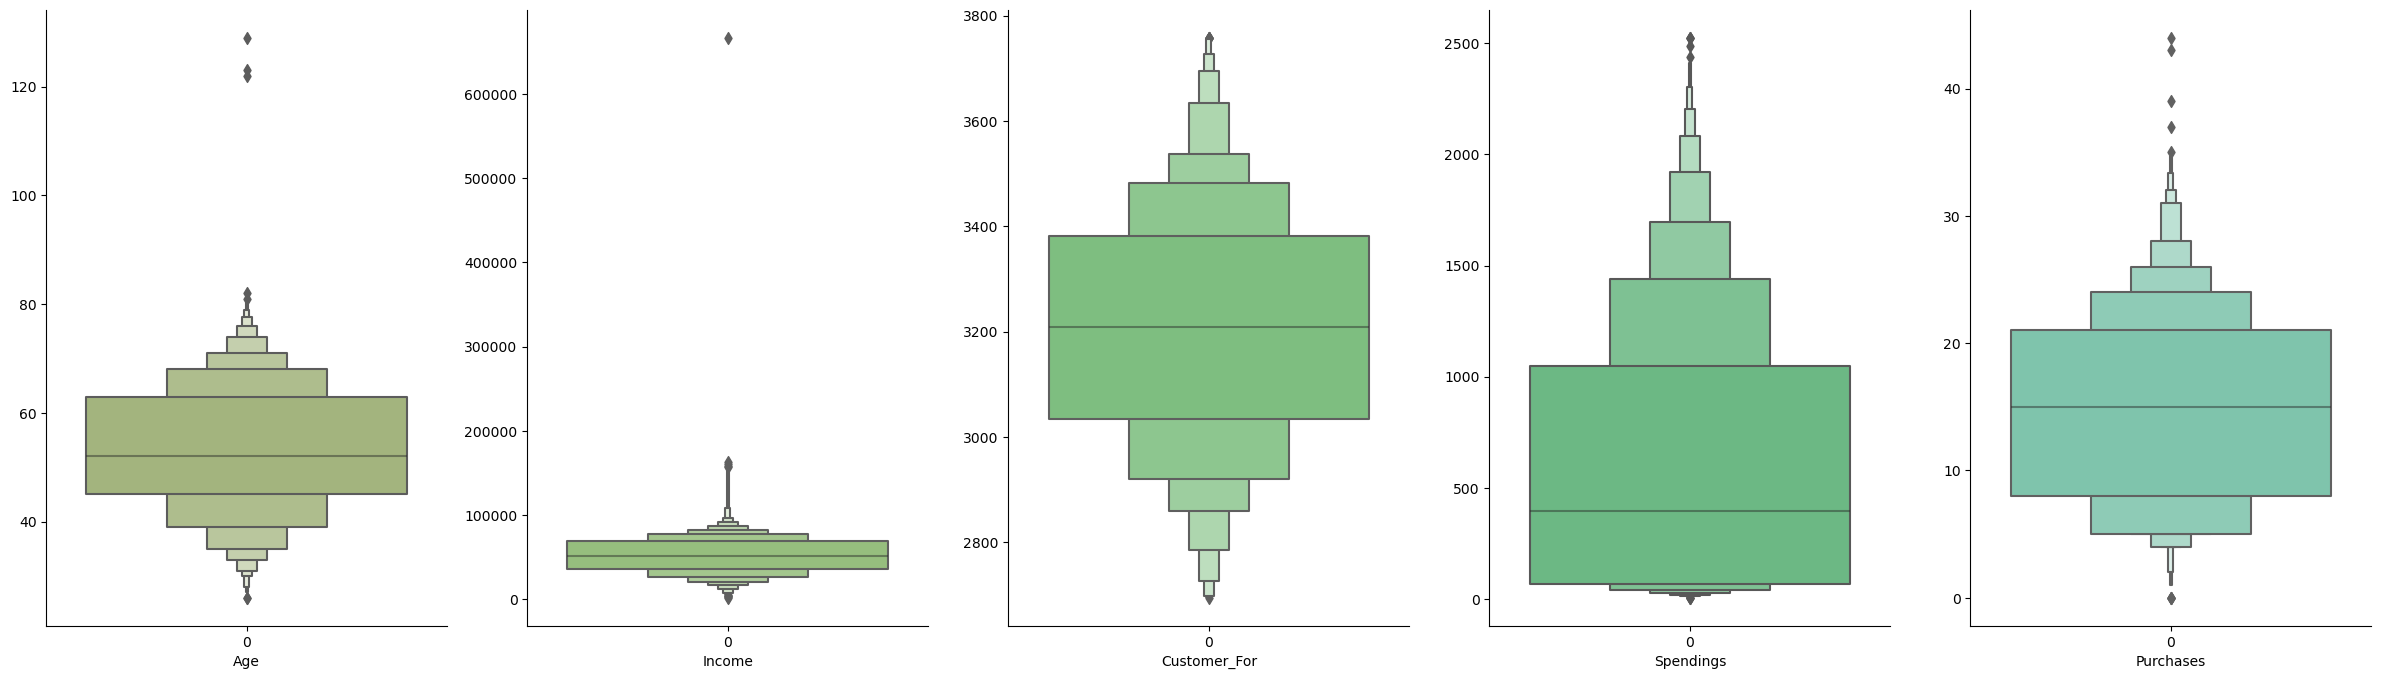

In [51]:
#examine the boxplots of different features
features= ["Age", "Income", "Customer_For", "Spendings", "Purchases"]

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
    sns.boxenplot(data=data[features[i]],
                  showfliers=True,
                  ax=axs[i],
                  palette=[palette[i]]).set(xlabel=features[i])
    sns.despine()

In [52]:
# checking the number of outliers in age and income 
print("Number of customers above the age of 100 is", len(data[data['Age']>100]))
print("Number of customers above the income of 200000 is", len(data[data['Income']>200000]))

Number of customers above the age of 100 is 3
Number of customers above the income of 200000 is 1


We can see some outliers in the age, income and purchases. Those in the age and income will be removed as they are very few data points. The ones in the purchases will be kept as the range of values is considerable.

In [53]:
data= data.drop(data[(data["Age"]>100) | (data["Income"]>200000)].index)
print("Current data points count= ",len(data))

Current data points count=  2212


In [54]:
dataCopy = data.copy()
data = data.drop(["Kidhome","Teenhome"],axis=1)

#### 3.3. Encoding Categorical Features

The 2 categorial features we have can be encoded as follows:


*   Education: using a label encoder since it's considered ordinal
*   Marital_Status: using one hot encoding since it's considered nominal



In [55]:
# label encode education
encoder= LabelEncoder()
data['Education']=data[["Education"]].apply(encoder.fit_transform)

#hot encode marital_status
data = pd.get_dummies(data)

#check data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2215
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2212 non-null   int32  
 1   Income                 2212 non-null   float64
 2   Recency                2212 non-null   int64  
 3   MntWines               2212 non-null   int64  
 4   MntFruits              2212 non-null   int64  
 5   MntMeatProducts        2212 non-null   int64  
 6   MntFishProducts        2212 non-null   int64  
 7   MntSweetProducts       2212 non-null   int64  
 8   MntGoldProds           2212 non-null   int64  
 9   NumDealsPurchases      2212 non-null   int64  
 10  NumWebPurchases        2212 non-null   int64  
 11  NumCatalogPurchases    2212 non-null   int64  
 12  NumStorePurchases      2212 non-null   int64  
 13  NumWebVisitsMonth      2212 non-null   int64  
 14  AcceptedCmp3           2212 non-null   int64  
 15  Acce

#### 3.4 Feature scaling 

Assuming that our distribution follows a normal distribution, we will use the standardscaler 

In [56]:
#Scale features
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

#check
data.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_Count,Family_Size,Customer_For,Spendings,Purchases,Accepted_Campaigns,Marital_Status_Single,Marital_Status_Taken
0,-0.893586,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,2.375425,1.018352,-1.264598,-1.758359,1.973583,1.676245,1.317945,-0.43916,1.349603,-1.349603
1,-0.893586,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,1.274785,1.404572,0.449070,-1.665144,-0.963297,-1.159273,-0.43916,1.349603,-1.349603
2,-0.893586,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,0.334530,-1.264598,-0.654644,-0.172664,0.280110,0.796425,-0.43916,-0.740959,0.740959
3,-0.893586,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.289547,0.069987,0.449070,-1.923210,-0.920135,-0.898513,-0.43916,-0.740959,0.740959
4,0.571657,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.033114,0.069987,0.449070,-0.822130,-0.307562,0.535666,-0.43916,-0.740959,0.740959


### 4. Dimensionality Reduction

#### 4.1. Feature extraction

Now let's take a look on the coorelation between features

<AxesSubplot:>

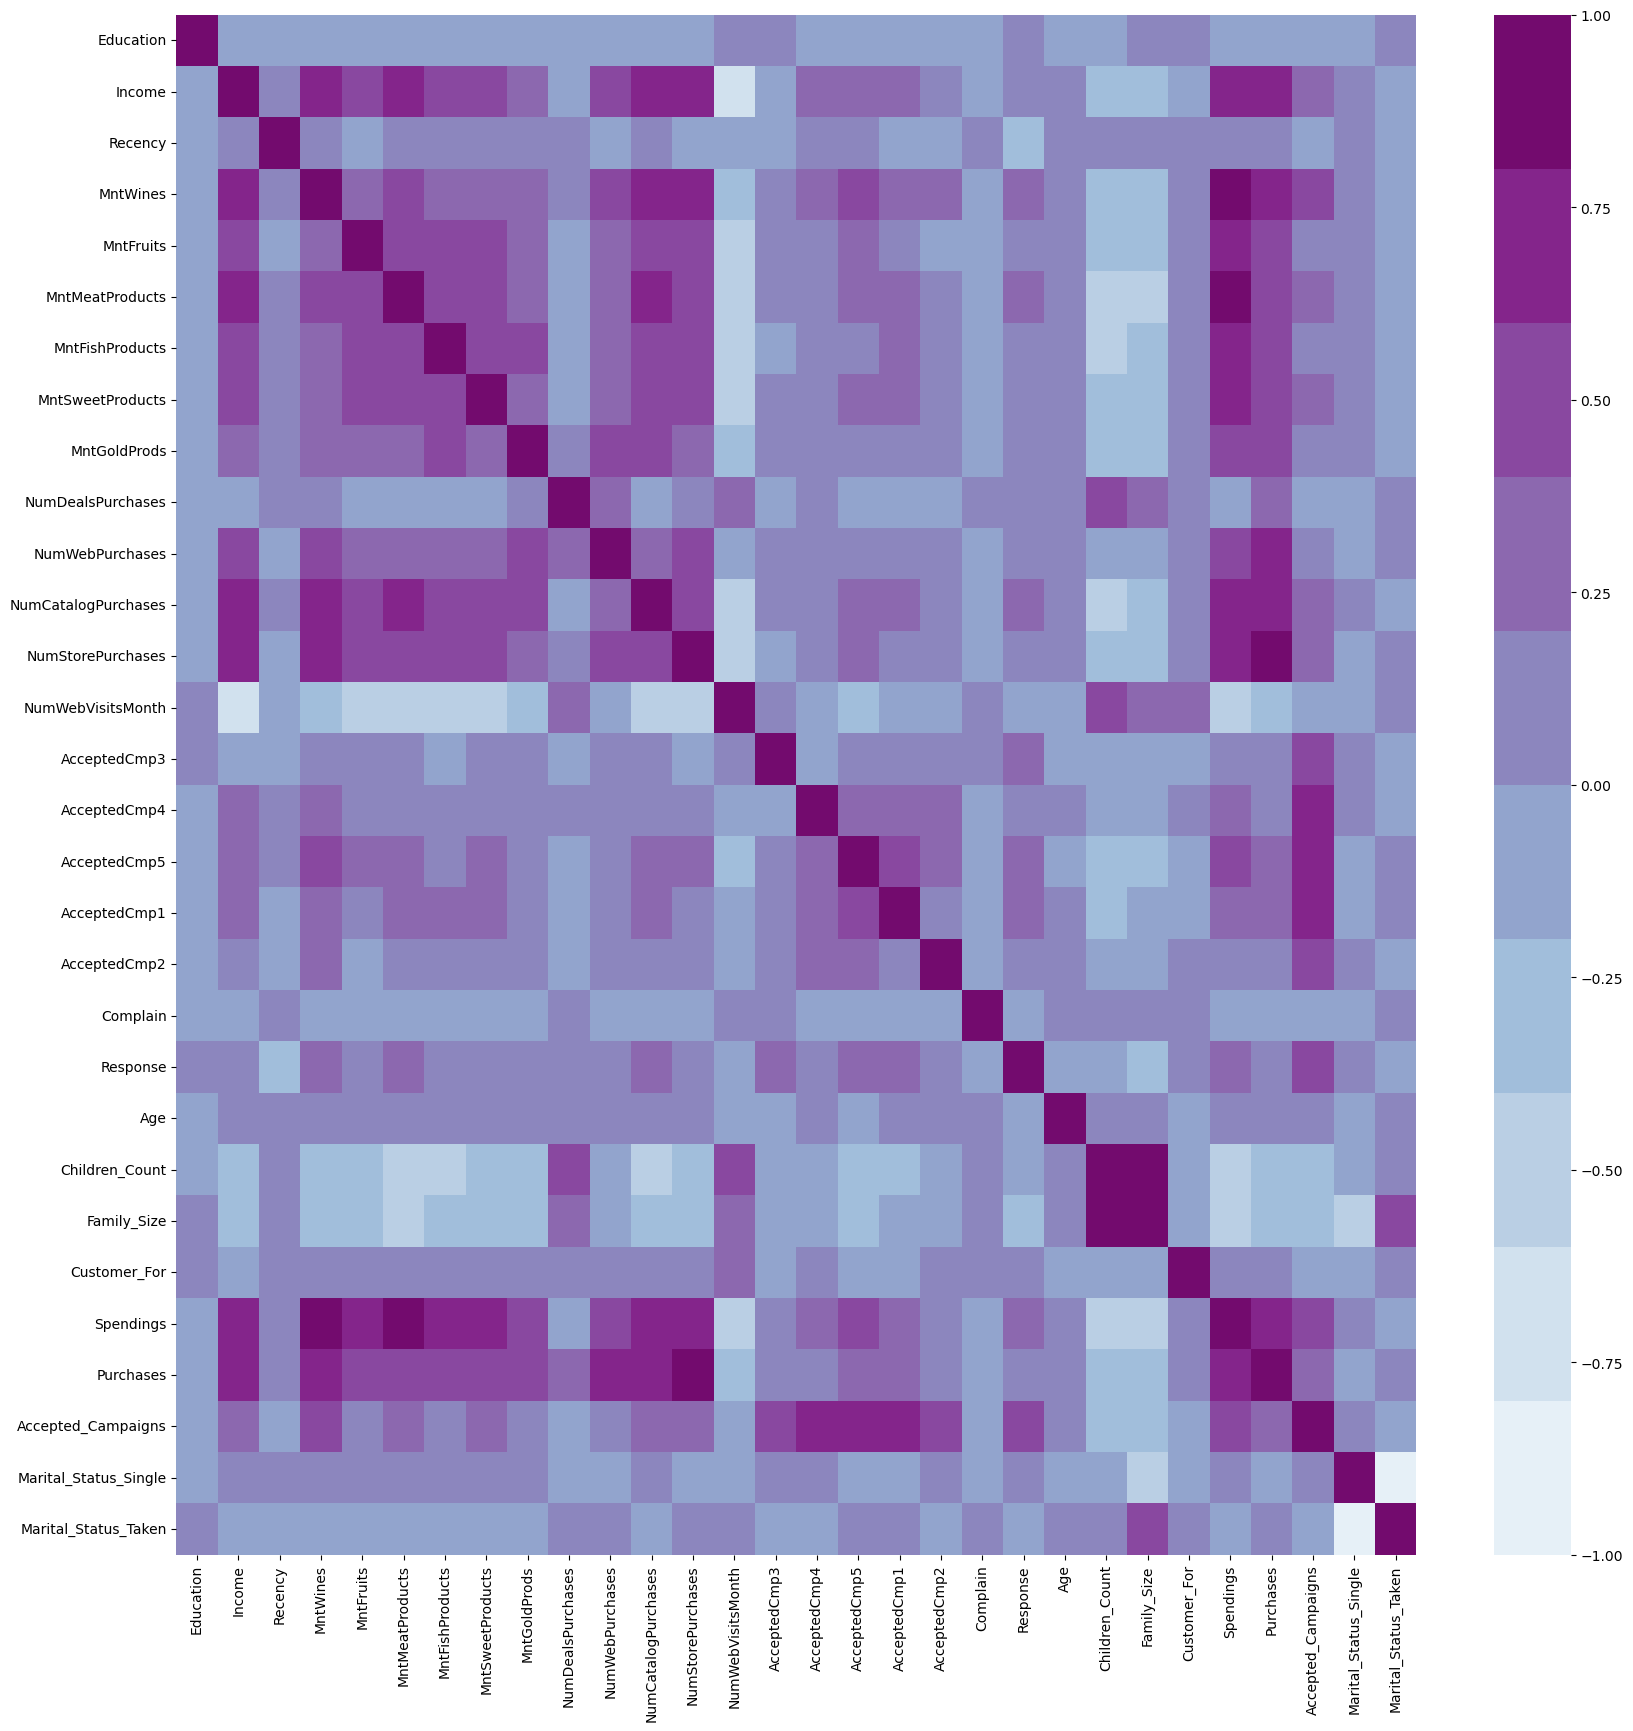

In [57]:
fig,ax = plt.subplots(figsize=(20,20))
#import plotly.express as px
#fig = px.imshow(data.corr())
#fig.show()
sns.heatmap(data.corr(),cmap=sns.color_palette('BuPu',10),ax=ax)

A lot of features have high correlation values. PCA will be used to reduce the dimensions while keeping 95% of the variations

In [58]:
#95%  variations
pca = PCA(n_components=0.95)
pca.fit(data)
reduced_data = pd.DataFrame(pca.transform(data))
print("Current number of features",len(reduced_data.columns))

Current number of features 20


By keeping 95% of the variations, the number of features dropped from 32 to 20, but we want to reduce that even more to reduce complexity, so we will compromise more variations.

In [59]:
#75%  variations
pca = PCA(n_components=0.75)
pca.fit(data)
reduced_data = pd.DataFrame(pca.transform(data))
print("Current number of features",len(reduced_data.columns))

Current number of features 10


In [60]:
reduced_data

,0,1,2,3,4,5,6,7,8,9
0,4.605378,-0.755068,-1.917570,2.577038,1.937583,0.384600,0.434224,0.569928,-0.574984,0.241186
1,-2.863008,-1.413863,-0.423587,0.376513,-2.066487,-2.106596,0.043017,0.289241,-0.495433,-0.132152
2,1.781123,0.887343,-1.229014,-0.806737,-0.085843,0.225743,-0.612138,0.499073,-0.820123,1.447669
3,-2.869203,-0.248172,0.138326,-1.621028,-0.020566,-0.484270,-0.110295,0.215018,-1.308722,-0.014449
4,-0.405215,1.478620,-0.469430,-0.465599,-0.170005,0.450082,0.709911,-0.958755,0.527134,-1.044981
...,...,...,...,...,...,...,...,...,...,...
2207,2.250210,2.069555,-0.892137,0.014253,0.995412,-0.447299,0.947423,-0.323680,-0.907672,1.094624
2208,-0.849203,3.396810,2.938072,0.818744,-2.147752,-2.665592,-0.383630,-0.589209,0.577828,-2.264101
2209,2.405278,-2.102802,0.369897,0.971885,-2.355757,2.084351,1.211738,-0.288315,-0.501117,0.307423
2210,1.556511,1.774588,-0.816800,-0.725608,-0.760810,-0.876337,-1.827557,0.252262,0.209832,0.664917


### 5. Data clustering

#### 5.1 Optimal Number of Clusters

First, we need to have a good sense of how many clusters are in our dataset. To determine this, we will use the elbow method.

In [61]:
#calculate distortions for different values of k (number of clusters)
distortions = []
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(reduced_data)
    distortions.append(kmeanModel.inertia_)

C:\Users\Vikram\AppData\Local\Temp/ipykernel_17208/4225976353.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, distortions, 'bx-', color=palette[-1])


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

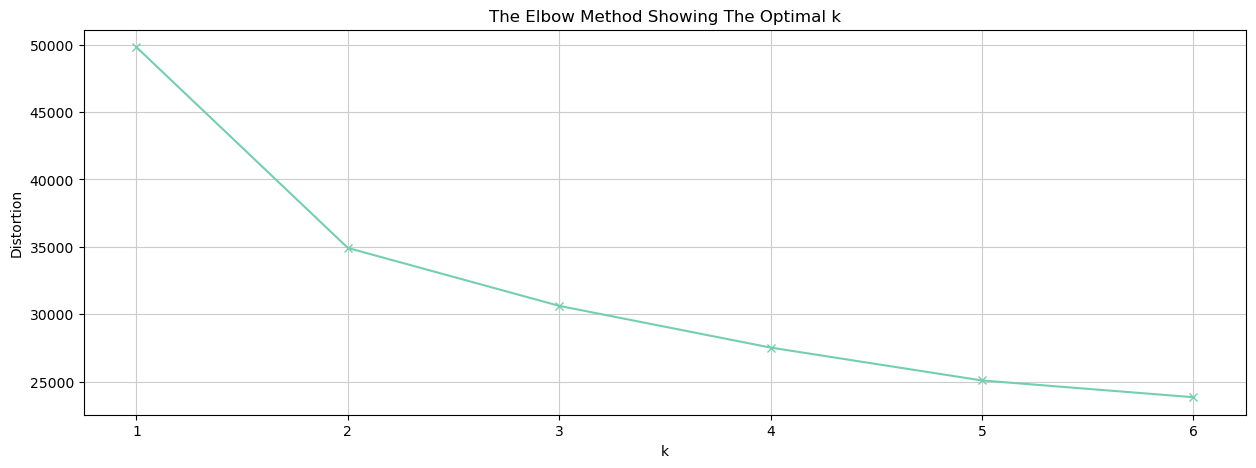

In [62]:
#plot elbow graph
plt.figure(figsize=(15,5))
plt.rcParams.update({'axes.grid':True})
plt.plot(K, distortions, 'bx-', color=palette[-1])
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing The Optimal k')
sns.despine

#### 4.2 Clustering algorithm

Clustering will be performed using the K-means algorithm, which assumes the clusters are somehow spherical in shape.

In [63]:
#Clustering data and adding the output to the dataframe

cluster = KMeans(n_clusters=4, random_state=202).fit(reduced_data)
data['Personality']=cluster.labels_
dataCopy['Personality']=cluster.labels_

data.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_Count,Family_Size,Customer_For,Spendings,Purchases,Accepted_Campaigns,Marital_Status_Single,Marital_Status_Taken,Personality
0,-0.893586,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-0.282048,...,-0.280175,-0.261914,-0.117256,-0.09552,2.375425,1.018352,-1.264598,-1.758359,1.973583,1.676245,1.317945,-0.43916,1.349603,-1.349603,1
1,-0.893586,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-0.282048,...,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,1.274785,1.404572,0.449070,-1.665144,-0.963297,-1.159273,-0.43916,1.349603,-1.349603,0
2,-0.893586,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.282048,...,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,0.334530,-1.264598,-0.654644,-0.172664,0.280110,0.796425,-0.43916,-0.740959,0.740959,1
3,-0.893586,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-0.282048,...,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.289547,0.069987,0.449070,-1.923210,-0.920135,-0.898513,-0.43916,-0.740959,0.740959,0
4,0.571657,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.282048,...,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.033114,0.069987,0.449070,-0.822130,-0.307562,0.535666,-0.43916,-0.740959,0.740959,2


#### 4.3 Algorithm evaluation 
To get a sense of whether our clustering algorithm provides reasonable results, we can look at the pie and bar plots of the clusters to see how they're distributed.

<AxesSubplot:title={'center':'Histogram of customer count in each personality'}, xlabel='Personality', ylabel='count'>

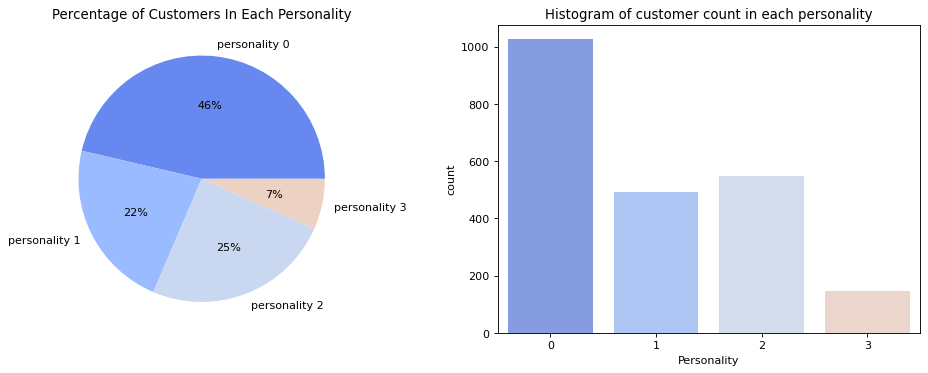

In [64]:
# define labels
labels = ['personality 0','personality 1','personality 2','personality 3']
counts = []

# compute counts 
for i in range(4):
    counts.append(len(data[data['Personality']==i]))

plt.figure(figsize=(15,5),dpi=80)
plt.rcParams.update({'axes.grid':False})

# pie plot
ax1 = plt.subplot2grid((1,2),(0,0))
ax1.set_title("Percentage of Customers In Each Personality")
plt.pie(counts, labels = labels, autopct='%.0f%%')

#bar plot
ax1 = plt.subplot2grid((1,2),(0,1))
ax1.set_title("Histogram of customer count in each personality")
sns.countplot(x=data["Personality"],alpha = 0.9,ax=ax1)

### Data Analysis

It's time to find out the special characteristics of each cluster. To do that, we'll study their demographics and behaviors against different features.

In [65]:
dataCopy

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_Count,Family_Size,Customer_For,Spendings,Purchases,Accepted_Campaigns,Personality
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,...,0,0,0,0,0,0,1,65,0,1,3666,1617,25,0,1
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,...,0,0,0,0,0,0,0,68,2,3,2820,27,6,0,0
2,Graduate,Taken,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,...,0,0,0,0,0,0,0,57,0,2,3167,776,21,0,1
3,Graduate,Taken,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,...,0,0,0,0,0,0,0,38,1,3,2760,53,8,0,0
4,Postgraduate,Taken,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,...,0,0,0,0,0,0,0,41,1,3,3016,422,19,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduate,Taken,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,...,0,0,0,0,0,0,0,55,1,3,3236,1341,18,0,1
2212,Postgraduate,Taken,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,...,0,0,0,1,0,0,0,76,3,5,2756,444,22,1,2
2213,Graduate,Single,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,...,0,1,0,0,0,0,0,41,0,1,3010,1241,19,1,1
2214,Postgraduate,Taken,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,...,0,0,0,0,0,0,0,66,1,3,3011,843,23,0,2


C:\Users\Vikram\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


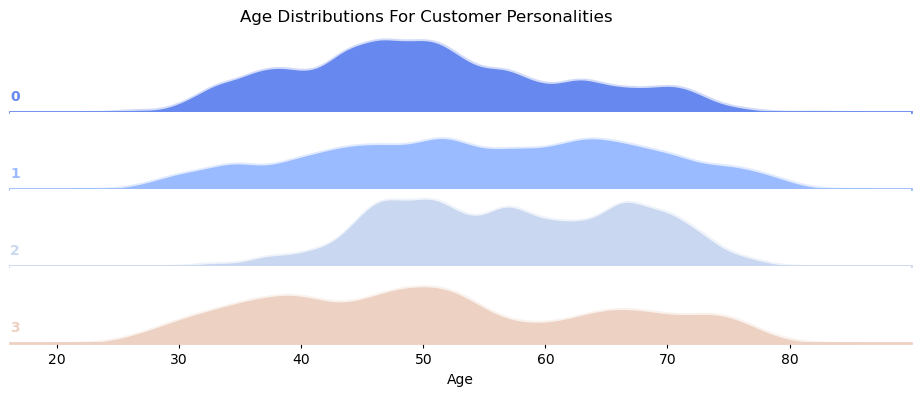

In [66]:
# Initialize the FacetGrid object
g = sns.FacetGrid(dataCopy,
                  row="Personality",
                  hue="Personality",
                  size= 1, aspect=10,
                  # palette=palette
                  )

# Draw the densities in a few steps
g.map(sns.kdeplot, "Age",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Age", clip_on=False, color="w", lw=2, bw_adjust=.5,alpha=.7)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(Age, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Age")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0.01)

# Remove axes details that don't play well with overlap
g.fig.suptitle('Age Distributions For Customer Personalities')
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [67]:
#personality 0 age stats
d= dataCopy[dataCopy["Personality"]==0]
perc= (len(d[d["Age"]<60])/len(d))*100
print("Percentage of customer below 60 in personality 0= {:.2f}% ".format(perc))

#personality 1 age stats
d= dataCopy[dataCopy["Personality"]==1]
perc= (len(d[d["Age"]<55])/len(d))*100
print("Percentage of customer below 55 in personality 1= {:.2f}% ".format(perc))

#personality 2 age stats
d= dataCopy[dataCopy["Personality"]==2]
perc= (len(d[d["Age"]>50])/len(d))*100
print("Percentage of customer above 50 in personality 2= {:.2f}% ".format(perc))

#personality 3 age stats
d= dataCopy[dataCopy["Personality"]==3]
perc= (len(d[d["Age"]<60])/len(d))*100
print("Percentage of customer below 60 in personality 3= {:.2f}% ".format(perc))

Percentage of customer below 60 in personality 0= 78.54% 
Percentage of customer below 55 in personality 1= 50.00% 
Percentage of customer above 50 in personality 2= 70.07% 
Percentage of customer below 60 in personality 3= 70.75% 


In [68]:
#family breakdown 

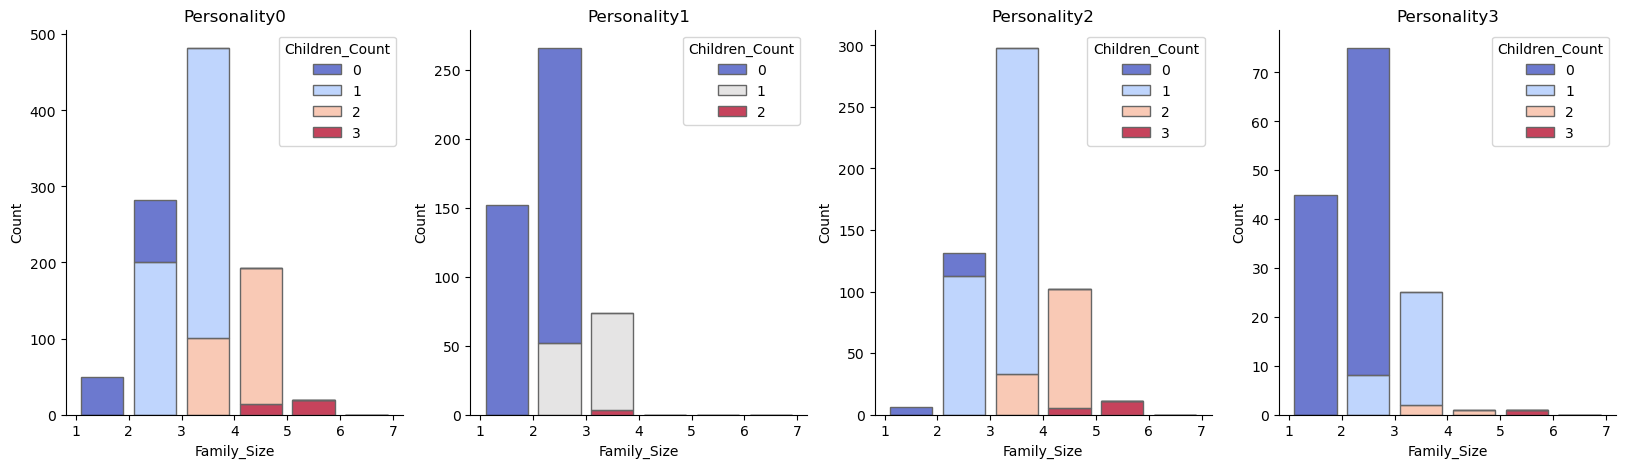

In [69]:
plt.figure(figsize=(20,5))

#plot a histogram of the family size showing children count in each bin

for i in range(4):
    ax1 = plt.subplot2grid((1,4),(0,i))
    ax1.set_title("Personality"+str(i))
    sns.histplot(dataCopy[dataCopy["Personality"]==i],x='Family_Size',
                 hue='Children_Count',multiple="stack",
                 palette="coolwarm",edgecolor=".4",bins=list(range(1,8)),
                shrink=.8)
    sns.despine()

##### Conclusion:

1.   Personality 0:
  *  The majority of customers have 1-2 kids and a partner.
  *  A considerable percentage are single parents.
2.   Personality 1: 
  *  The majority of customers have no kids (or 1 at most).
  *  Almost equal numbers of single and non-single customers. 
  *  A considerable percentage are living alone.
  *  Very few single parents. 
  *  Max family size is 3, which is fewer than the other segments.
3.   Personality 2: 
  *  The majority of customers have 1-2 kids and a partner. 
  *  Relatively fewer single parents.
4.   Personality 3:
  *  The vast majority have 0 kids, followed by 1 kid.
  *  A considerable percentage are living alone.
  *  Very few single parents. 

Time for some stats.

In [70]:
#personality 0 kids stats
d= dataCopy[dataCopy["Personality"]==0]
perc= ((len(d[d["Children_Count"]==1]) + len(d[d["Children_Count"]==2]))/len(d))*100
print("Percentage of customers having 1-2 kids in personality 0 = {:.2f}% ".format(perc))

#personality 1 kids stats
d= dataCopy[dataCopy["Personality"]==1]
perc= ((len(d[d["Children_Count"]==0]))/len(d))*100
print("Percentage of customers having 0 kids in personality 1 = {:.2f}% ".format(perc))

#personality 2 kids stats
d= dataCopy[dataCopy["Personality"]==2]
perc= ((len(d[d["Children_Count"]==1]) + len(d[d["Children_Count"]==2]))/len(d))*100
print("Percentage of customers having 1-2 kids in personality 2 = {:.2f}% ".format(perc))

#personality 3 kids stats
d= dataCopy[dataCopy["Personality"]==3]
perc= ((len(d[d["Children_Count"]==0]))/len(d))*100
print("Percentage of customers having 0 kids in personality 3 = {:.2f}% ".format(perc))

Percentage of customers having 1-2 kids in personality 0 = 84.10% 
Percentage of customers having 0 kids in personality 1 = 74.39% 
Percentage of customers having 1-2 kids in personality 2 = 92.70% 
Percentage of customers having 0 kids in personality 3 = 76.19% 


In [71]:
#single parents in personality 0
d= dataCopy[dataCopy["Personality"]==0]
perc= (len(d[d["Marital_Status"]=="Single"])/len(dataCopy[dataCopy["Marital_Status"]=="Single"]))*100
print("Percentage of single parents belonging to personality 0= {:.2f}% ".format(perc))

Percentage of single parents belonging to personality 0= 46.56% 


#### 5.1.3 Education


Next, we will examine the educational level of the different customer personalities using a histogram.

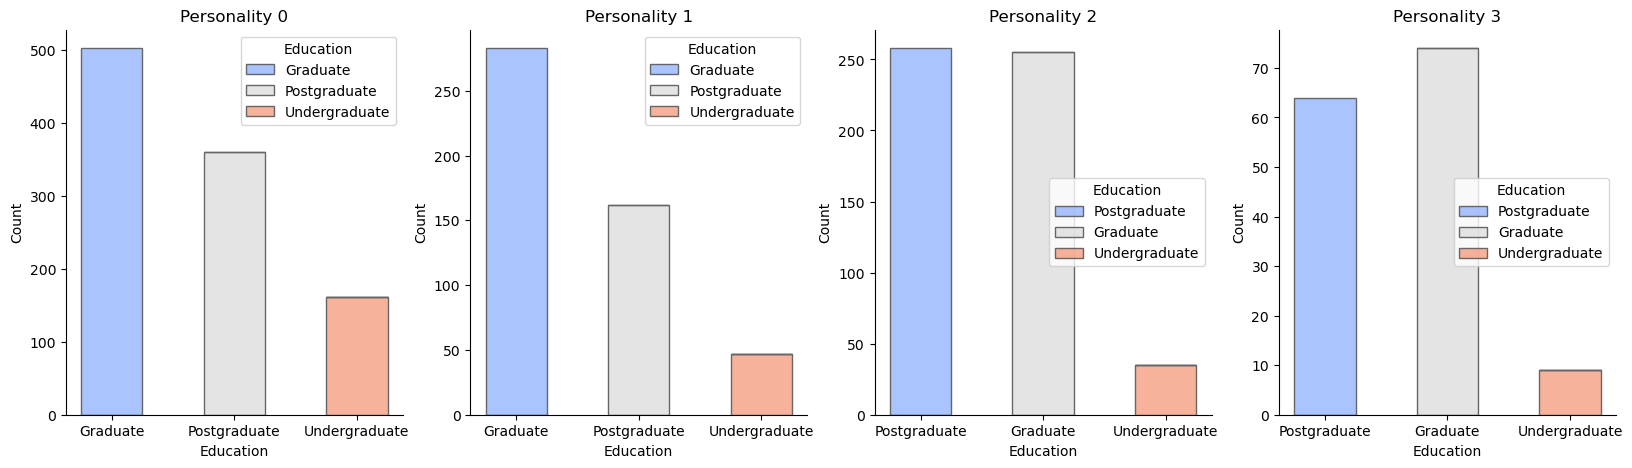

In [72]:
plt.figure(figsize=(20, 5))

#plotting a histogram of family size showing children count in each bin
for i in range(4):
  ax1 = plt.subplot2grid((1,4),(0,i))
  ax1.set_title("Personality "+str(i))
  sns.histplot(
      dataCopy[dataCopy["Personality"]==i],
      x="Education",
      hue= "Education",
      palette="coolwarm",
      multiple="stack",
      edgecolor=".4",
      shrink = .5
  )
  sns.despine()

### 5.1.4. Income

Now we'll visualize the income distributions of the different segments.

C:\Users\Vikram\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


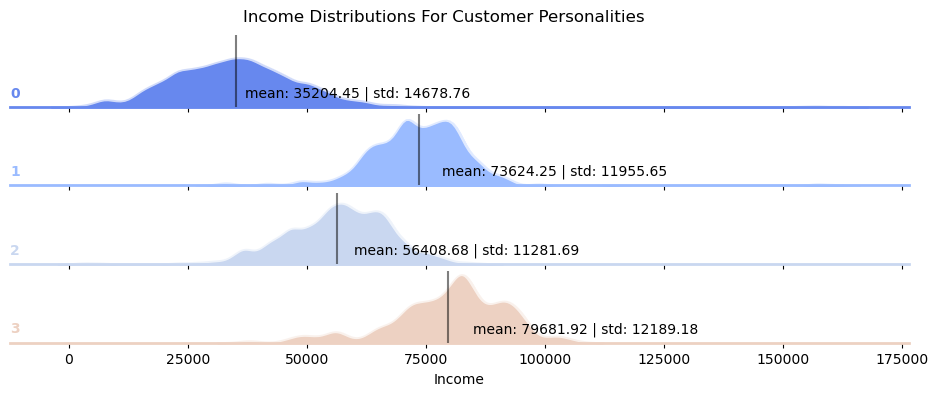

In [73]:
# Initialize the FacetGrid object
g = sns.FacetGrid(dataCopy,
                  row="Personality",
                  hue="Personality",
                  size= 1, aspect=10,
                  # palette=palette
                  )

# Draw the densities in a few steps
g.map(sns.kdeplot, "Income",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Income", clip_on=False, color="w", lw=2, bw_adjust=.5, alpha=.7)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(Income, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Income")

# Add vertical lines for mean age on each plot
def vertical_mean_line_survived(x, **kwargs):
    plt.axvline(x.mean(), linestyle ="-", 
                color = "black", alpha=.5)
    txkw = dict(size=10, color = "black")
    tx = "mean: {:.2f} | std: {:.2f}".format(x.mean(),x.std())
    ax = plt.gca()
    ax.text(0.06+x.mean()/175000, .2, tx, color="black", size= 10,
            ha="left", va="center", transform=ax.transAxes)
    # plt.text(x.mean()+1, 0.0052, tx, **txkw)

g.map(vertical_mean_line_survived, 'Income')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0.1)

# Remove axes details that don't play well with overlap
g.fig.suptitle('Income Distributions For Customer Personalities')
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

Conclusion:

1.   Personality 0 (Low):
  *   Lowest average income group
  *   Highest variation in income
2.   Personality 1 (High):
  *   Relatively higher average income group
  *   Average variation in income
3.   Personality 2 (Average):
  *   Average income group
  *   Average variation in income
4.   Personality 3 (High):
  *  Highest average income group
  *  Similar to personality 1 group with slightly more variance

### 5.2 Business Related

We will focus on the business related aspect of the customer's personality to get more insights

#### 5.2.1 Products Breakdown 
We will use a simple pie chart to visualize the types of products frequently bought by the customers.

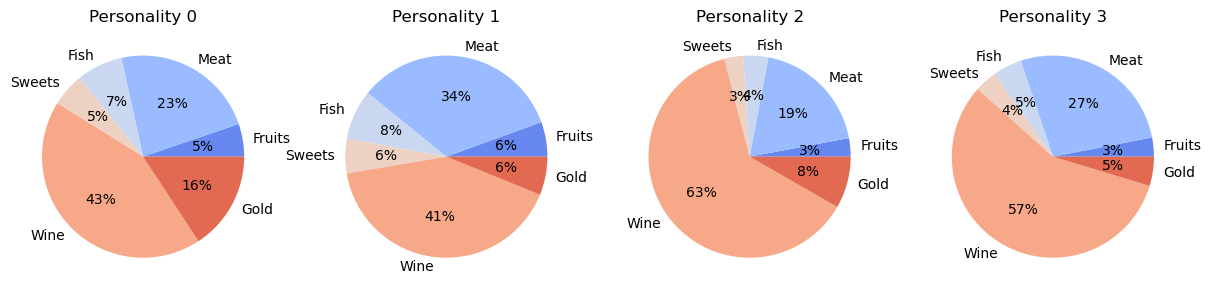

In [74]:
#define labels
labels = ['Fruits', 'Meat', 'Fish', 'Sweets', 'Wine', 'Gold']
plt.figure(figsize=(15, 10), dpi=100)

#compute counts
for i in range(4):
  counts= []
  #getting the data of the current segment
  d= dataCopy[dataCopy["Personality"]==i]

  #computing counts
  counts.append(d["MntFruits"].sum())
  counts.append(d["MntMeatProducts"].sum())
  counts.append(d["MntFishProducts"].sum())
  counts.append(d["MntSweetProducts"].sum())
  counts.append(d["MntWines"].sum())
  counts.append(d["MntGoldProds"].sum())

  #plotting chart
  ax1 = plt.subplot2grid((1,4),(0,i))
  ax1.set_title("Personality "+str(i))
  plt.pie(counts, labels = labels, autopct='%.0f%%')

plt.show()

From the above plots, we can see that:
*  The percentage of spendings on primary goods such as fruits, fish and sweets is very close across all segments.
*  Spendings on meat vary across segments.
* Personality 0 spends relatively more on gold compared to other segments.
* Personality 2 spends the most on wine.


#### 5.2.2 Spendings

To examine the value added by the customers, we will plot the purchases against the spendings for each segment.

C:\Users\Vikram\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 400x400 with 0 Axes>

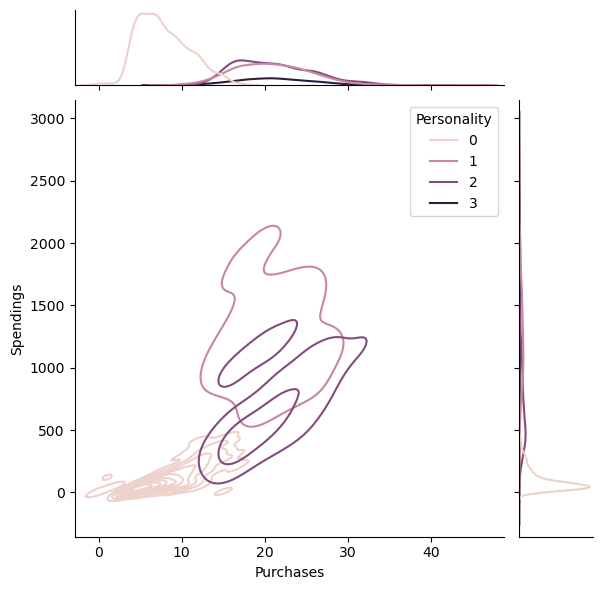

In [75]:
# Show the joint distribution using kernel density estimation
plt.figure(figsize=(5,5),dpi=80)
g = sns.jointplot(data=dataCopy,x="Purchases",y="Spendings",hue="Personality",kind="kde")
sns.despine()

Conclusion:
1.   Personality 0: Few purchases, low spendings.
2.   Personality 1: Relatively higher spendings, meaning that they buy more expensive products. 
3.   Personalities 1,2,3: Similar average purchases. 
4. Personality 3: Not clearly visible in the plot due to the limited number of data. We need more plots.

We will also plot the family size against the spendings for each segment.

<Figure size 400x400 with 0 Axes>

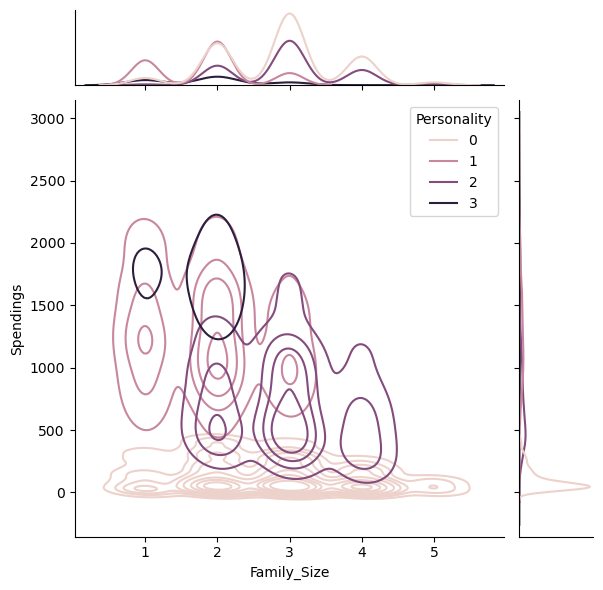

In [76]:
plt.figure(figsize=(5, 5), dpi=80)
g = sns.jointplot(data=dataCopy, x="Family_Size", y="Spendings", hue="Personality",kind="kde")
sns.despine()

The above plot supports the previous conclusions made about the family sizes. 

We will now plot the customer_for against the spendings for each segment.

<Figure size 400x400 with 0 Axes>

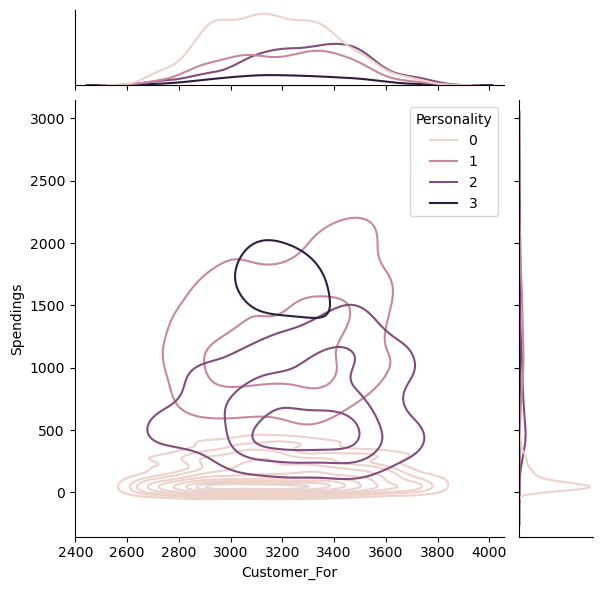

In [77]:
plt.figure(figsize=(5, 5), dpi=80)
g = sns.jointplot(data=dataCopy, x="Customer_For", y="Spendings", hue="Personality",kind="kde")
sns.despine()

From the above plot, we can see that no new customers from personality 2 have joined recently, if though they have the highest spendings.

## 5.3. Behavioural

### 5.3.1. Response To Campaigns

Finally, we will examine the customer's reactions to the company's campaigns in terms of how many campaigns have they accepted.

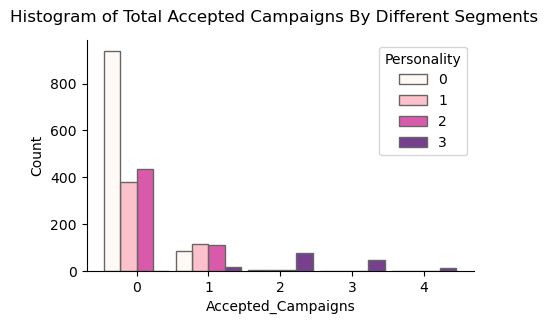

In [78]:
f= plt.figure(figsize=(5, 3))
f.suptitle("Histogram of Total Accepted Campaigns By Different Segments")
sns.histplot(dataCopy, x="Accepted_Campaigns", hue= "Personality", multiple="dodge", palette="RdPu", edgecolor=".4", discrete= True, shrink= .9)
sns.despine()

Conclusion:

*   Personalities 0, 1 & 2: Majority accepted 0 campaigns. Very few accepted only 1.
*   Personality 3: Majority accepted 2 campaigns. Some accepted 3 or 4. Very few accepted only 1. No one accepted 0 campaigns.

# 6. Summary

We finally reached the end of the analysis. Here is a summary of the main features of each customer segment/personality:

#### Personality 0  

- are 48% of all customers
- has 79% of them are below 60
- 84% of have kids
- 47% of single parent included

Low income and spending 

#### Personality 1

- are 22% of all customers
- has 50% are below 55(all age groups)
- 76% have no kids
- 3 Max family size

Higher income and spending

#### Personality 2 

- 25% of all customers
- 70% are above 50s 
- 93% have 1-2 kids

Average income

##### Personality 3

- 7% of all customers
- 70% are below 60 
- 75% have no kids

High income and spending